In [391]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import pandas as pd
import numpy as np
import re
import time
from datetime import datetime
import itertools
import statistics
from datetime import date

In [470]:
precint_link=str('15-10025')

In [488]:
try:
    x=1
    pages=2
    Rate_List=[]
    while x<=pages:
        Url='https://www.zameen.com/Residential_Plots/Karachi_Bahria_Town_Karachi_Bahria_Town___Precinct_'+precint_link+'-'+str(x)+'.html?sort=price_asc'
        req = Request(Url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        soup = BeautifulSoup(webpage, 'html')    
        from_result=int(soup.find_all('span', {'class':['a0f2e258']})[0].get_text().split(" ")[0].replace(',',""))
        to_result=int(soup.find_all('span', {'class':['a0f2e258']})[0].get_text().split(" ")[2].replace(',',""))
        total_result=int(soup.find_all('span', {'class':['a0f2e258']})[0].get_text().split(" ")[4].replace(',',""))
        if x==1:
            pages=int(round(total_result/(to_result-from_result),0))
        print("Scrapped "+soup.find_all('span', {'class':['a0f2e258']})[0].get_text())
        [Rate_List.append(float(a.get_text().replace('Lakh',''))) for a in soup.find_all('span', {'class':['f343d9ce']}) if 'Lakh' in a.get_text() ]
        x+=1
except:
    print("\nScrapping Complete!")

Scrapped 1 to 25 of 603 Residential Plots
Scrapped 26 to 50 of 603 Residential Plots
Scrapped 51 to 75 of 603 Residential Plots
Scrapped 76 to 100 of 603 Residential Plots
Scrapped 101 to 125 of 603 Residential Plots
Scrapped 126 to 150 of 603 Residential Plots
Scrapped 151 to 175 of 603 Residential Plots
Scrapped 176 to 200 of 603 Residential Plots
Scrapped 201 to 225 of 603 Residential Plots
Scrapped 226 to 250 of 603 Residential Plots
Scrapped 251 to 275 of 603 Residential Plots
Scrapped 276 to 300 of 603 Residential Plots
Scrapped 301 to 325 of 603 Residential Plots
Scrapped 326 to 350 of 603 Residential Plots
Scrapped 351 to 375 of 603 Residential Plots
Scrapped 376 to 400 of 603 Residential Plots
Scrapped 401 to 425 of 603 Residential Plots
Scrapped 426 to 450 of 603 Residential Plots
Scrapped 451 to 475 of 603 Residential Plots
Scrapped 476 to 500 of 603 Residential Plots
Scrapped 501 to 525 of 603 Residential Plots
Scrapped 526 to 550 of 603 Residential Plots
Scrapped 551 to 57

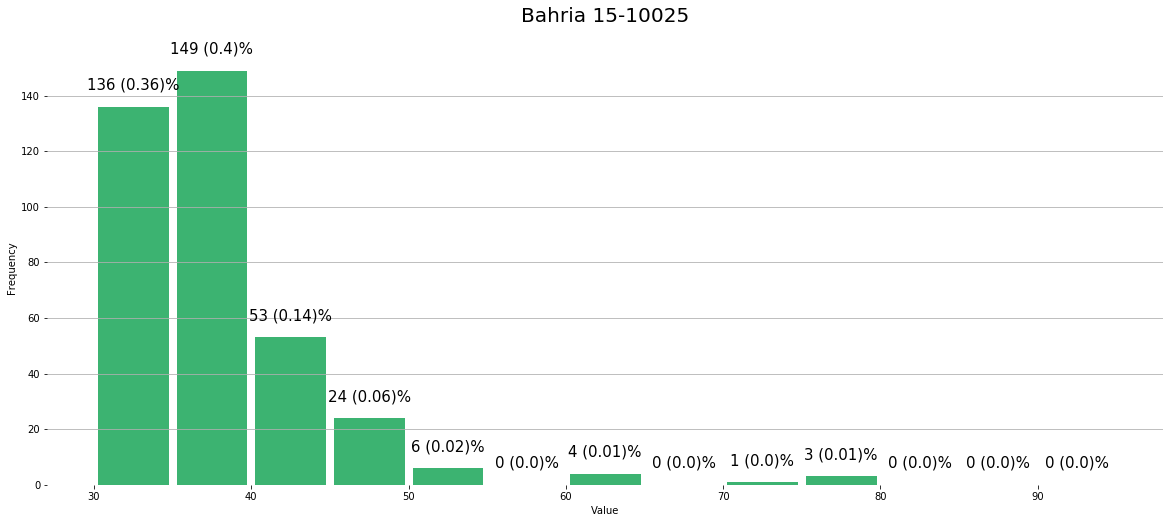

In [489]:
import matplotlib.pyplot as plt

bin_size=5

# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=Rate_List, bins=range(30,100,+bin_size), color='#3cb371',rwidth=.9,joinstyle='bevel')
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.box(False)
plt.title('Bahria '+precint_link,fontsize=20,ha='center').set_position([.5, 1.05])
labels=n
fig = plt.gcf()
fig.set_size_inches(20,8)

for rect, label in zip(patches, n):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, str(int(label))+' ('+str(round(int(label)/sum(n),2))+')%',fontsize=15,
            ha='center', va='bottom')

plt.show()

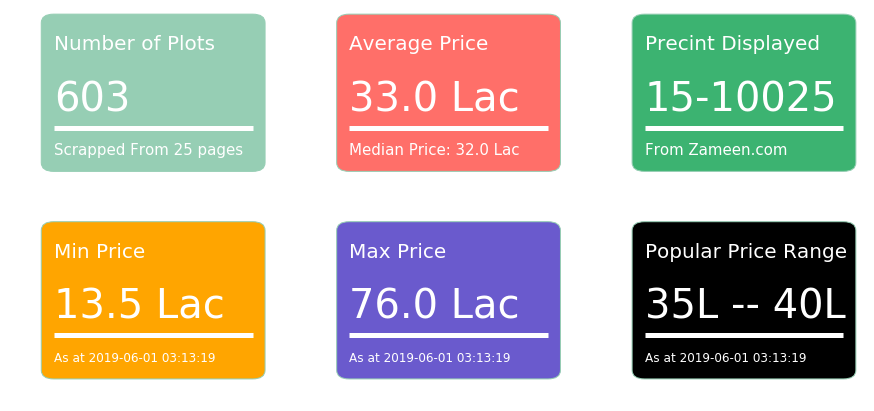

In [498]:
import matplotlib.transforms as mtransforms
from matplotlib.patches import FancyBboxPatch

#CALCULATING STATISTICS

Plots=len(Rate_List)
Average_Price=statistics.mean(Rate_List)
Median_Price=statistics.median(Rate_List)
Min_Price=min(Rate_List)
Max_Price=max(Rate_List)
popular_price_range=str(bins[n.argmax()])+"L -- "+str(bins[n.argmax()]+bin_size)+"L"

#PLOTING KPIS

fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(15,7))

p_fancy = FancyBboxPatch(xy= (0.1, 0.1), width= 0.8,height= 0.8, boxstyle="round,pad=0.05", fc= "#96CEB4", ec= "#96CEB4")
axes[0][0].add_patch(p_fancy)
axes[0][0].text(0.1, 0.4,"{:,}".format(len(Rate_List)),size=40, color = "#ffffff")
axes[0][0].text(0.1, 0.75, "Number of Plots",size=20, color = "#ffffff")
axes[0][0].text(0.1, 0.15,"Scrapped From "+str(pages)+' pages' ,size=15, color = "#ffffff")
axes[0][0].hlines(y = 0.3, xmin=0.1, xmax=0.9, linewidth=5, color = "#ffffff")
axes[0][0].axis('off')

p_fancy = FancyBboxPatch(xy= (0.1, 0.1), width= 0.8,height= 0.8, boxstyle="round,pad=0.05", fc= "#FF6F69", ec= "#96CEB4")
axes[0][1].add_patch(p_fancy)
axes[0][1].text(0.1, 0.4,str(format(round(Average_Price,2)))+" Lac",size=40, color = "#ffffff")
axes[0][1].text(0.1, 0.75, "Average Price",size=20, color = "#ffffff")
axes[0][1].text(0.1, 0.15, "Median Price: "+str(format(round(Median_Price,2)))+" Lac",size=15, color = "#ffffff")
axes[0][1].hlines(y = 0.3, xmin=0.1, xmax=0.9, linewidth=5, color = "#ffffff")
axes[0][1].axis('off')

p_fancy = FancyBboxPatch(xy= (0.1, 0.1), width= 0.8,height= 0.8, boxstyle="round,pad=0.05", fc= "#3cb371", ec= "#96CEB4")
axes[0][2].add_patch(p_fancy)
axes[0][2].text(0.1, 0.75, "Precint Displayed",size=20, color = "#ffffff")
axes[0][2].text(0.1, 0.4,precint_link,size=40, color = "#ffffff")
axes[0][2].text(0.1, 0.15,"From Zameen.com" ,size=15, color = "#ffffff")
axes[0][2].hlines(y = 0.3, xmin=0.1, xmax=0.9, linewidth=5, color = "#ffffff")
axes[0][2].axis('off')

p_fancy = FancyBboxPatch(xy= (0.1, 0.1), width= 0.8,height= 0.8, boxstyle="round,pad=0.05", fc= "#ffa500", ec= "#96CEB4")
axes[1][0].add_patch(p_fancy)
axes[1][0].text(0.1, 0.4,str(format(round(Min_Price,2)))+" Lac",size=40, color = "#ffffff")
axes[1][0].text(0.1, 0.75, "Min Price",size=20, color = "#ffffff")
axes[1][0].text(0.1, 0.15,"As at "+str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')) ,size=12, color = "#ffffff")
axes[1][0].hlines(y = 0.3, xmin=0.1, xmax=0.9, linewidth=5, color = "#ffffff")
axes[1][0].axis('off')

p_fancy = FancyBboxPatch(xy= (0.1, 0.1), width= 0.8,height= 0.8, boxstyle="round,pad=0.05", fc= "#6a5acd", ec= "#96CEB4")
axes[1][1].add_patch(p_fancy)
axes[1][1].text(0.1, 0.4,str(format(round(Max_Price,2)))+" Lac",size=40, color = "#ffffff")
axes[1][1].text(0.1, 0.75, "Max Price",size=20, color = "#ffffff")
axes[1][1].text(0.1, 0.15,"As at "+str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')) ,size=12, color = "#ffffff")
axes[1][1].hlines(y = 0.3, xmin=0.1, xmax=0.9, linewidth=5, color = "#ffffff")
axes[1][1].axis('off')

p_fancy = FancyBboxPatch(xy= (0.1, 0.1), width= 0.8,height= 0.8, boxstyle="round,pad=0.05", fc= "#000000", ec= "#96CEB4")
axes[1][2].add_patch(p_fancy)
axes[1][2].text(0.1, 0.4,popular_price_range,size=40, color = "#ffffff")
axes[1][2].text(0.1, 0.75, "Popular Price Range",size=20, color = "#ffffff")
axes[1][2].text(0.1, 0.15,"As at "+str(datetime.now().strftime('%Y-%m-%d %H:%M:%S')) ,size=12, color = "#ffffff")
axes[1][2].hlines(y = 0.3, xmin=0.1, xmax=0.9, linewidth=5, color = "#ffffff")
axes[1][2].axis('off')

# for ax in axes:
#     ax.xaxis.set_visible(False)
#     ax.yaxis.set_visible(False)
    
#     for pos in ['top','right','left','bottom']:
#         ax.spines[pos].set_visible(False)

fig.tight_layout
fig.show()

